In [87]:
import os

import numpy as np
import tensorflow as tf
import tensorflow_io as tfio
import matplotlib.pyplot as plt
import seaborn as sns
import augmentation


## Using tf functions to split between training and validation data

In [88]:
train_ds, val_ds = tf.keras.utils.audio_dataset_from_directory(
    directory="data2",
    batch_size=64,
    validation_split=0.2,
    seed=0,
    output_sequence_length=16000, # padding shorter files to one second, trimming longer files to one second
    subset='both')

label_names = np.array(train_ds.class_names)
print()
print("label names:", label_names)

Found 53 files belonging to 5 classes.
Using 43 files for training.
Using 10 files for validation.

label names: ['fernando' 'gross' 'kaffee' 'klein' 'ok']


In [94]:
audio = tfio.audio.AudioIOTensor('data2/fernando/fernando_hasan.wav') #Open Audio File
audio

<AudioIOTensor: shape=[44037     1], dtype=<dtype: 'int16'>, rate=44100>

Apply Short Time Fourier Transformation

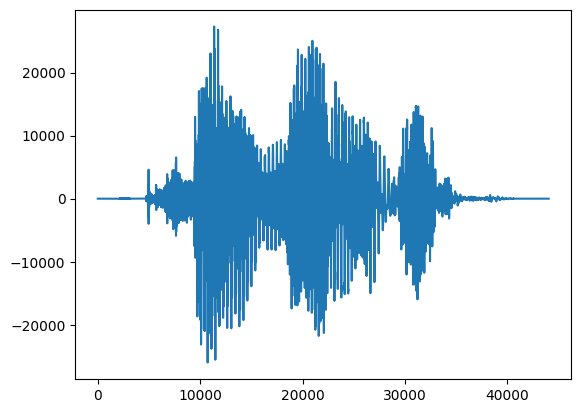

In [95]:
audio_tensor = audio.to_tensor()[:160000]
audio_tensor = tf.cast(audio_tensor, tf.float32)
audio_tensor = tf.squeeze(audio_tensor)


audio_tensor

plt.figure()

plt.plot(audio_tensor.numpy())

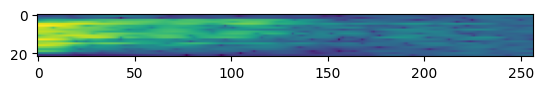

In [96]:
spectrogram = tfio.audio.spectrogram(
    audio_tensor, nfft=512, window=64, stride=2048)

plt.figure()
plt.imshow(tf.math.log(spectrogram).numpy())

In [99]:
pitched_audio = augmentation.pitch_shift_audio(audio_tensor, 2)
pitched_audio

TypeError: pitch_shift_audio() missing 1 required positional argument: 'n_steps'